**Necessary libraries**

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

**Dataset**

In [ ]:
df = pd.read_csv('quiz-dataset.csv')
print(df.head())
#df.info()
#df.describe()

<ipython-input-28-8e8263145b6a>:1: DtypeWarning: Columns (28,29,31,39,41,42,43,67,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('quiz-dataset.csv')


                    id      conversation_id  referenced_tweets.replied_to.id  \
0  1604264110627094528  1604264110627094528                              NaN   
1  1604263630433751040  1604263630433751040                              NaN   
2  1604262860049158144  1604262860049158144                              NaN   
3  1604262823953055746  1604262823953055746                              NaN   
4  1604262537557643266  1604262537557643266                              NaN   

   referenced_tweets.retweeted.id  referenced_tweets.quoted.id  \
0                             NaN                          NaN   
1                    1.603443e+18                          NaN   
2                    1.592630e+18                          NaN   
3                             NaN                 1.604123e+18   
4                             NaN                          NaN   

             author_id  in_reply_to_user_id in_reply_to_username  \
0            121812371                  NaN           

**Part A: Word cloud visualization**

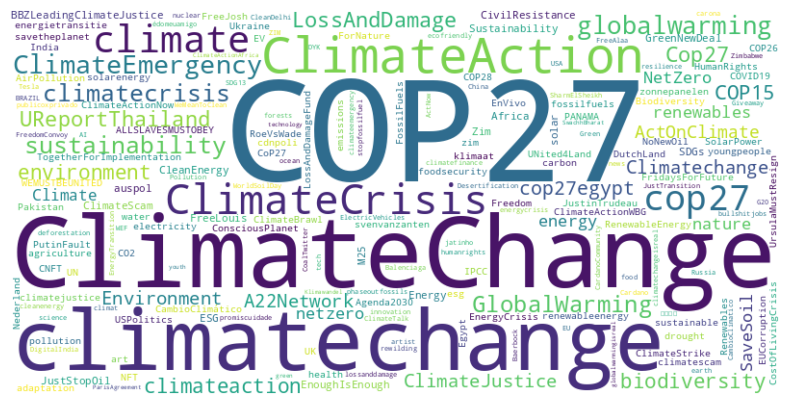

In [ ]:
# a function toextract hashtags
def extract_hashtags(text):
  """Extracts hashtags from a given text."""
  return re.findall(r"#(\w+)", text)

df['hashtags'] = df['text'].apply(extract_hashtags)

all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]

# Create a dictionary to count hashtag frequency
hashtag_counts = {}
for hashtag in all_hashtags:
  if hashtag in hashtag_counts:
    hashtag_counts[hashtag] += 1
  else:
    hashtag_counts[hashtag] = 1

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**B.
Tweet Volume Over Time:**

**Line Chart**

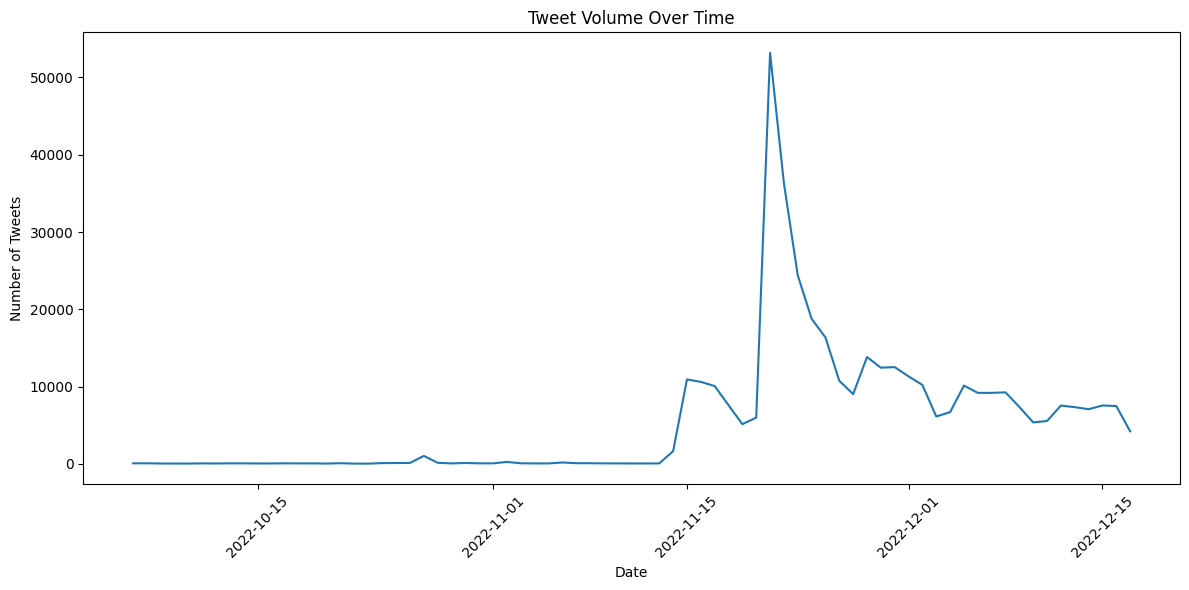

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

# Group tweets by day
tweet_counts_by_day = df.groupby(df['created_at'].dt.date).size()

# Create a line chart to visualize tweet volume over time
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts_by_day.index, tweet_counts_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Tweet Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Bar Chart**

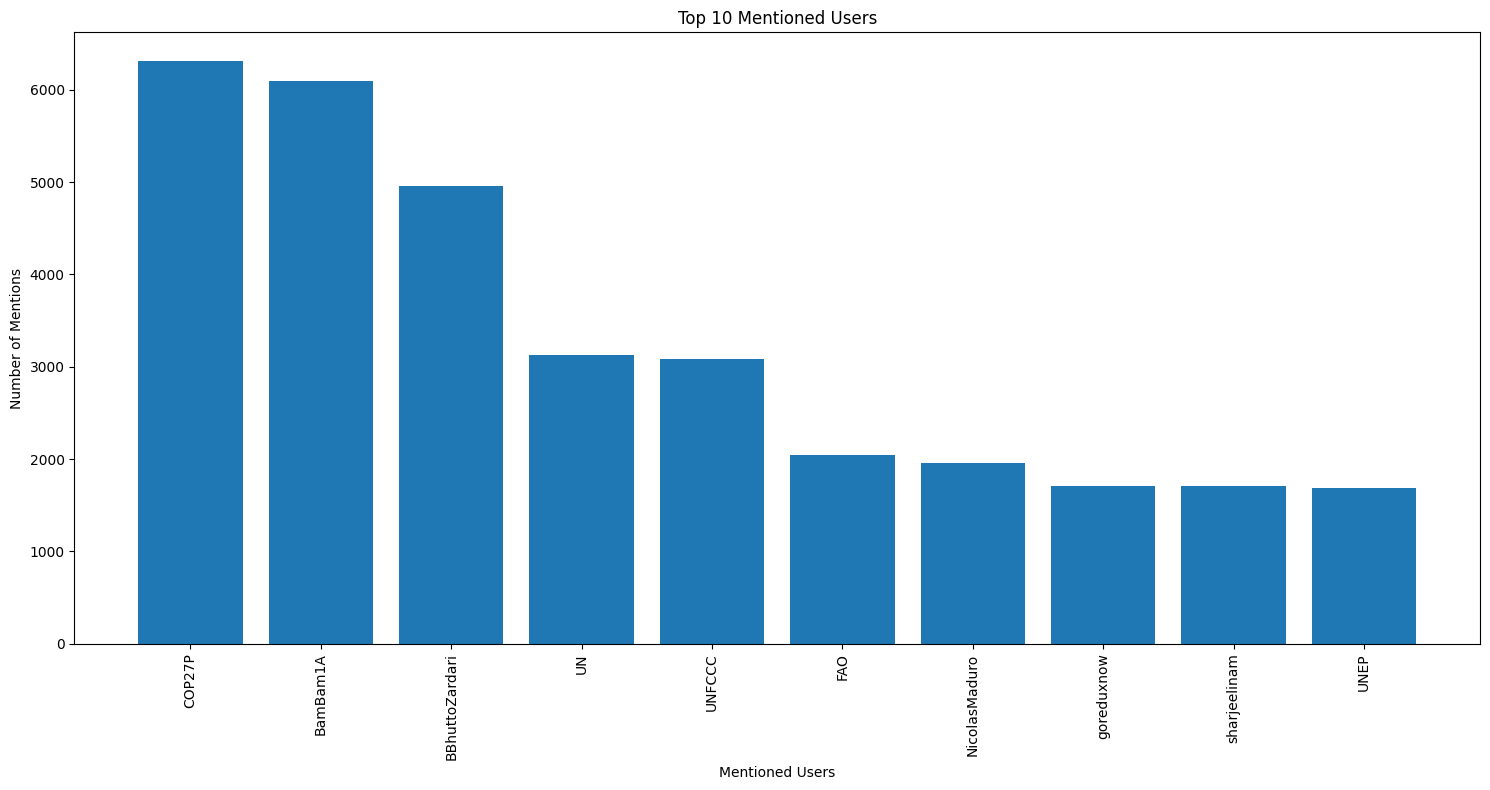

In [ ]:
user_mentions_counts = {}
for text in df['text']:
    mentions = re.findall(r'@(\w+)', text)
    for mention in mentions:
        if mention in user_mentions_counts:
            user_mentions_counts[mention] += 1
        else:
            user_mentions_counts[mention] = 1

#user mentions by count in descending order
sorted_user_mentions = dict(sorted(user_mentions_counts.items(), key=lambda item: item[1], reverse=True))

#top 50 mentioned users
top_10_mentioned_users = dict(list(sorted_user_mentions.items())[:10])

#bar chart to
plt.figure(figsize=(15, 8))
plt.bar(top_10_mentioned_users.keys(), top_10_mentioned_users.values())
plt.xlabel('Mentioned Users')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Mentioned Users')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Part C**

**Question 1**

1.Prominent Figures Involved- Tweets from well-known figures, such as @BBhuttoZardari (the Foreign Minister of Pakistan) and @NicolasMaduro (President of Venezuela), are likely to attract more attention. Their positions and influence in political discussions about climate change amplify the importance of their messages.

2.Timeliness and Relevance- Many tweets are related to recent events or significant discussions at the COP27 climate conference. Tweets discussing timely topics, such as the impacts of climate change or new initiatives, resonate with current global conversations and attract more engagement.

3.Use of Visuals and Links- Tweets that include visuals, such as images or links to articles (e.g., @BBhuttoZardari's article on climate change), tend to capture more interest. Visuals can enhance understanding and engagement, prompting users to click and share the content.

4.Hashtags and Trends- The use of popular hashtags like #COP27, #ClimateAction, and #ClimateChange helps categorize the tweets within broader discussions. This visibility can lead to higher engagement as users search for or follow these topics.

**Question 2**

Tweet from @BBhuttoZardari:

Content: In a new article, @BBhuttoZardari discusses the severe effects of climate change in 2022 and highlights the importance of the loss and damage facility created at COP27 to help vulnerable countries. This tweet shares a new article by a political leader explaining how climate change is hurting many people and why it is crucial to support those who are most affected.

Tweet from @UN:

Content:The tweet mentions a Twitter Space discussion about climate and COP27, featuring several speakers who talked about important issues related to climate change. This tweet invites people to listen to a discussion where experts talk about climate change topics and what happened at the COP27 conference.